Imports

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Helper Functions

In [57]:
def one_hot(labels, num_classes):
    onehot = np.zeros((labels.shape[0], num_classes))
    onehot[np.arange(labels.shape[0]), labels] = 1
    return onehot

Import and Format Data

In [58]:
root = './data/'
train_images_filepath = root + 'train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_filepath = root + 'train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_filepath = root + 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_filepath = root + 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

def load_mnist_images(filepath):
    with open(filepath, 'rb') as f:
        raw_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
    data = raw_images.reshape(raw_images.shape[0], -1) / 255.0
    return data

def load_mnist_labels(filepath):
    with open(filepath, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

train_images = load_mnist_images(train_images_filepath)
train_labels = load_mnist_labels(train_labels_filepath)
test_images = load_mnist_images(test_images_filepath)
test_labels = load_mnist_labels(test_labels_filepath)

train_labels_onehot = one_hot(train_labels, len(np.unique(train_labels)))
test_labels_onehot = one_hot(test_labels, len(np.unique(train_labels)))

Create an MLP Class

In [59]:
class mlp():
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

        self.learning_rate = learning_rate
        self.train_loss = []

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        return self.sigmoid(s)*(1-self.sigmoid(s))
    
    def loss(self, y, yhat):
        return -np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    
    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward_propagation(self, X, y, yhat):
        m = X.shape[1]
        self.dz2 = yhat - y
        self.dW2 = 1/m * np.dot(self.a1.T, self.dz2)
        self.db2 = 1/m * np.sum(self.dz2, axis=0, keepdims=False)
        self.dz1 = np.dot(self.dz2, self.W2.T) * self.sigmoidPrime(self.z1)
        self.dW1 = 1/m * np.dot(X.T, self.dz1)
        self.db1 = 1/m * np.sum(self.dz1, axis=0, keepdims=False)
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            yhat = self.forward_propagation(X)
            self.backward_propagation(X, y, yhat)
            loss = self.loss(y, yhat)
            self.train_loss.append(loss)
            if epoch % 10 == 0:
                print(f'Epoch {epoch}/{epochs} - loss: {loss}')

    def plot_loss(self):
        fig, ax = plt.subplots(figsize=(5,5))
        ax.plot(range(len(self.train_loss)), self.train_loss)
        ax.set_title("error rate as a function of epochs")
        ax.set_xlabel("epoch")
        ax.set_ylabel("Classification error")
        ax.grid(True)  # Enables the grid.
        plt.show()

Train the mlp

Epoch 0/1000 - loss: 2.713312700760409
Epoch 10/1000 - loss: 0.42653758068278247
Epoch 20/1000 - loss: 0.29766513765231056
Epoch 30/1000 - loss: 0.24034624144620215
Epoch 40/1000 - loss: 0.2076552103841127
Epoch 50/1000 - loss: 0.1861983047433193
Epoch 60/1000 - loss: 0.1708626512680079
Epoch 70/1000 - loss: 0.15924384828802698
Epoch 80/1000 - loss: 0.15006395520289662
Epoch 90/1000 - loss: 0.14257863744682872
Epoch 100/1000 - loss: 0.1363220620219973
Epoch 110/1000 - loss: 0.13098843161434848
Epoch 120/1000 - loss: 0.1263691795279516
Epoch 130/1000 - loss: 0.12231667852275806
Epoch 140/1000 - loss: 0.11872280461154772
Epoch 150/1000 - loss: 0.11550611371304867
Epoch 160/1000 - loss: 0.11260387093941364
Epoch 170/1000 - loss: 0.10996686560679729
Epoch 180/1000 - loss: 0.10755591116222846
Epoch 190/1000 - loss: 0.1053394090549325
Epoch 200/1000 - loss: 0.10329160526582734
Epoch 210/1000 - loss: 0.10139130946389924
Epoch 220/1000 - loss: 0.09962093156323507
Epoch 230/1000 - loss: 0.09796

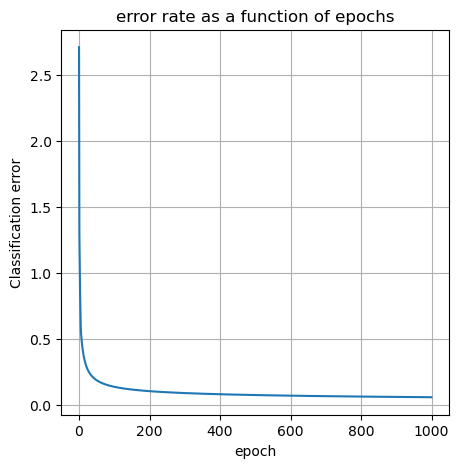

In [60]:
X_tr = train_images
y_tr = train_labels_onehot
X_te = test_images
y_te = test_labels_onehot

input_size = X_tr.shape[1]
hidden_size = 128
output_size = len(np.unique(train_labels))
learning_rate = 0.01
num_epoch = 1000

NN = mlp(input_size, hidden_size, output_size, learning_rate)
NN.train(X_tr, y_tr, num_epoch)
NN.plot_loss()

Apply results to unseen data and compute performance

Test accuracy: 0.9154


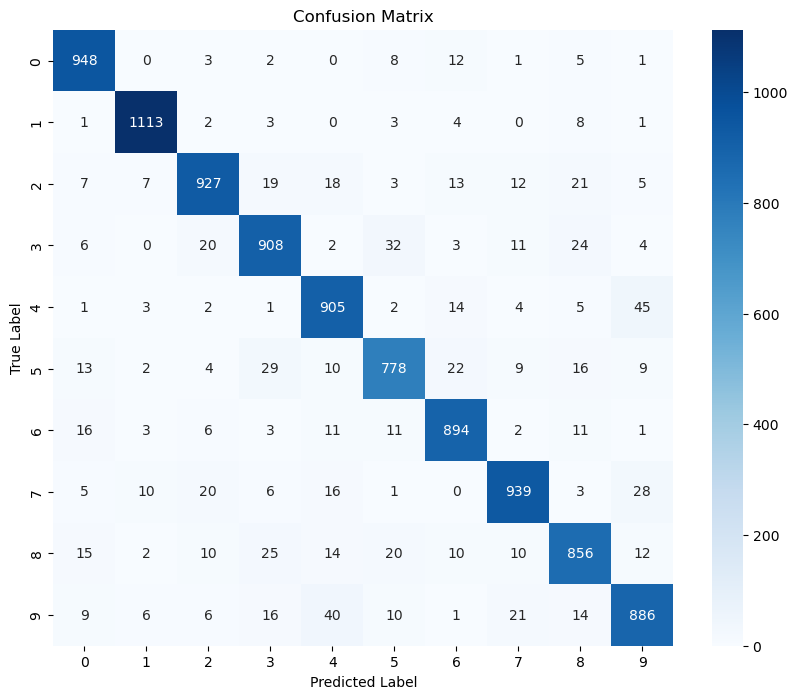

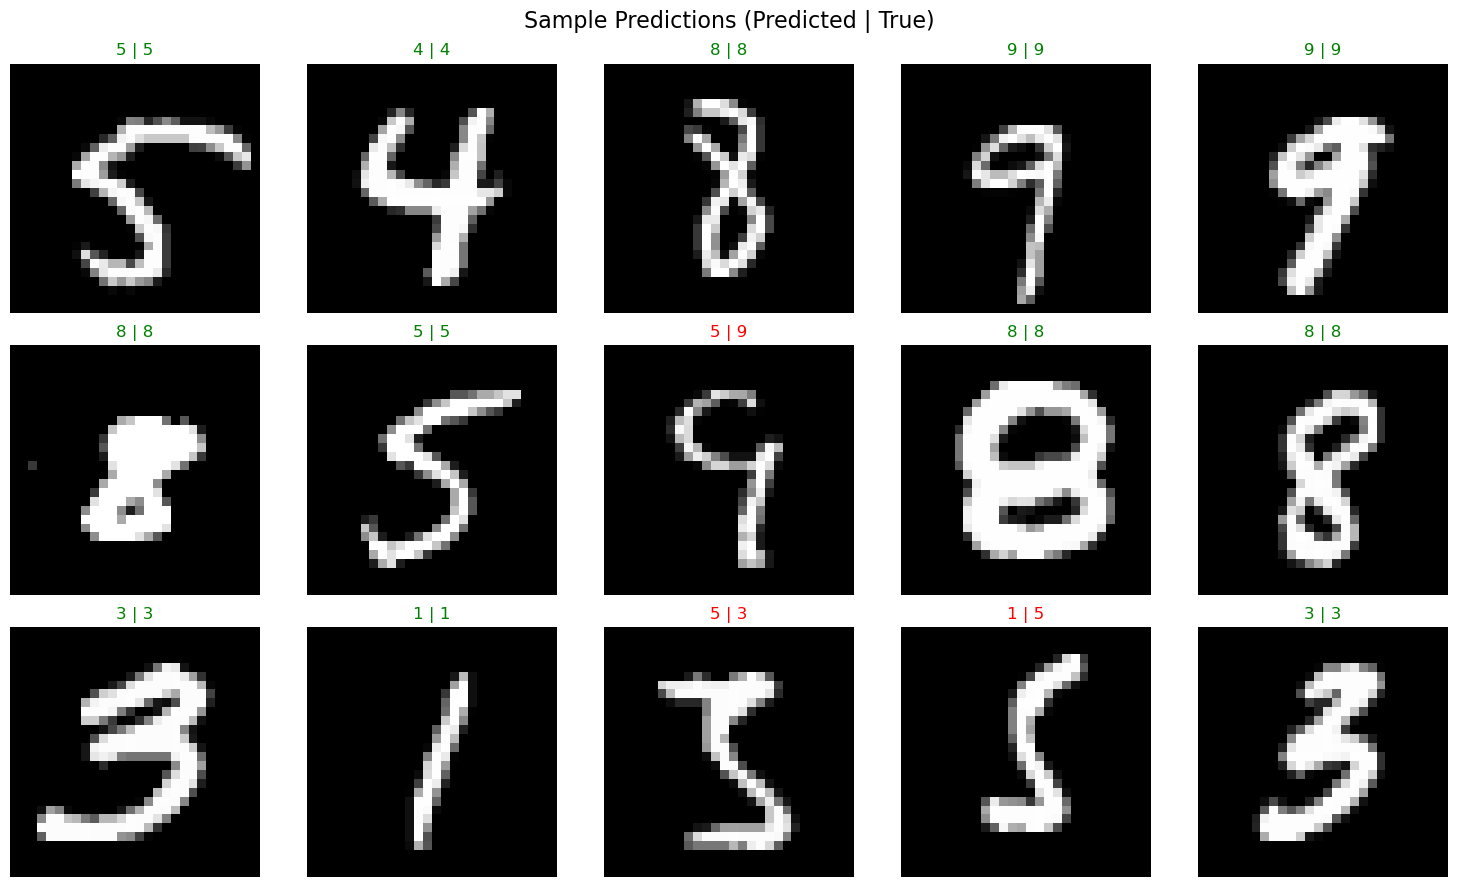

In [61]:
# Make predictions on test data
test_predictions = NN.forward_propagation(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels)
print(f"Test accuracy: {accuracy:.4f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize some examples
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Sample Predictions (Predicted | True)', fontsize=16)

# Get random indices to visualize
samples = np.random.randint(0, len(test_images), 15)

for i, ax in enumerate(axes.flat):
    # Get sample index
    idx = samples[i]
    
    # Display image
    ax.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    
    # Display prediction vs true label
    pred_label = predicted_labels[idx]
    true_label = test_labels[idx]
    ax.set_title(f"{pred_label} | {true_label}", 
                color='green' if pred_label == true_label else 'red')
    ax.axis('off')

plt.tight_layout()
plt.show()